## Introduction
***

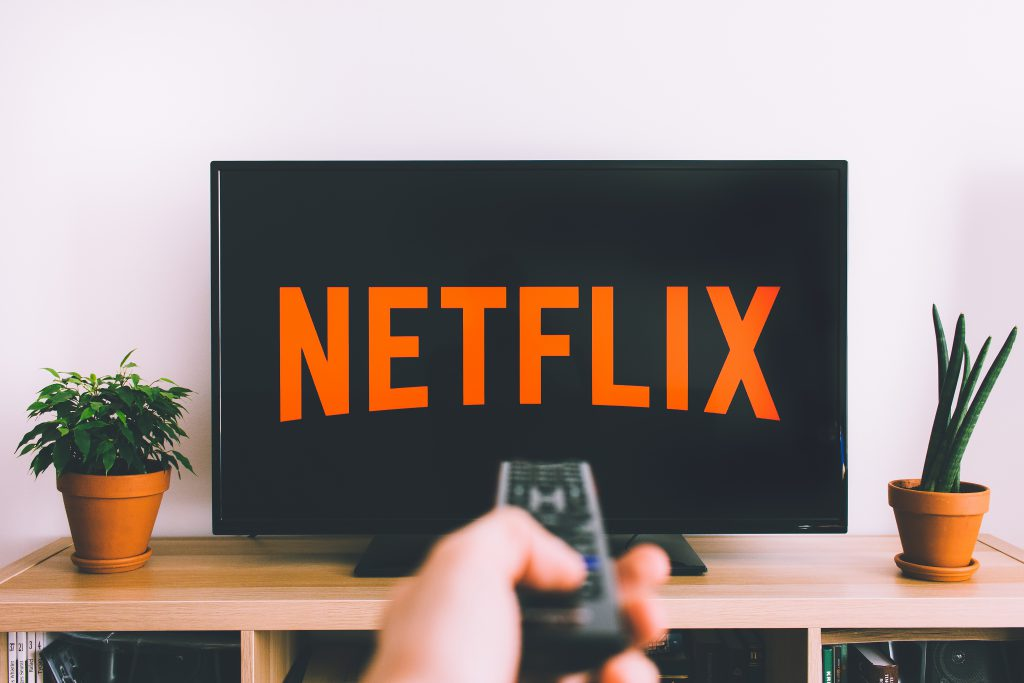

In this project, we will act as a data visualization developer at Yahoo Finance! we will be helping the "Netflix Stock Profile" team visualize the Netflix stock data. In finance, a _stock profile_ is a series of studies, visualizations, and analyses that dive into different aspects a publicly traded company's data. 

For the purposes of the project, we will only visualize data for the year of 2017. Specifically, we will be creating the following visualizations:

+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 


During this project, we will analyze, prepare, and plot data. Our visualizations will help the financial analysts asses the risk of the Netflix stock.

Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/) \
Note: This project is provided by Codeacademy.

## Import Libraries

Let's get our notebook ready for visualizing! Import the libraries that we'll be using in this project:
- matplotlib
- pandas
- numpy
- seaborn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Inspect the Data

The data you will use for creating your visualizations come from the following datasets:

 - `NFLX` is the stock ticker symbol for Netflix and `^DJI` is the stock ticker symbol for the Dow Jones industrial Average.
 - In the Yahoo Data, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.
 - we can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 

Let's load the datasets and inspect them.

While inspecting the variables, we need to think of these questions about the data such as:

- Is the data represented by days, weeks, or months? 
- In which ways are the files different? 
- What's different about the columns for `netflix_stocks` versus `netflix_stocks_quarterly`?

In [2]:
netflix_stocks = pd.read_csv("NFLX.csv")
netflix_stocks_quarterly = pd.read_csv("NFLX_daily_by_quarter.csv")
netflix_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


In [3]:
netflix_stocks_quarterly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1


In [4]:
dowjones_stocks = pd.read_csv('DJI.csv')
dowjones_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,6482450000
1,2017-02-01,19923.810547,20851.330078,19831.089844,20812.240234,20812.240234,6185580000
2,2017-03-01,20957.289063,21169.109375,20412.800781,20663.220703,20663.220703,6941970000
3,2017-04-01,20665.169922,21070.900391,20379.550781,20940.509766,20940.509766,5392630000
4,2017-05-01,20962.730469,21112.320313,20553.449219,21008.650391,21008.650391,6613570000


### Comments
- The data is represented by days.
- The dowjones_stocks dataframe contains information about stock outside of Netflix.
- The sizes of the dataframes vary.
- The netflix_stocks and netflix_stocks_quarterly differ in that netflix_stocks represents 
- Netflix daily stocks for a period of time, while netflix_stocks_quarterly represents the quarterly price for a period of time.

## Rename Adj close

Notice how The first two column names are one word each, and the only one that is not is `Adj Close`!

The term `Adj Close` is a confusing term if you don't read the Yahoo Documentation. In Yahoo, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.

This means this is the column with the true closing price, so these data are very important.

Change the name of the `Adj Close` column to `Price` all of the dataframes.

In [5]:
netflix_stocks = netflix_stocks.rename(columns={'Adj Close': 'Price'})
netflix_stocks_quarterly = netflix_stocks_quarterly.rename(columns={'Adj Close': 'Price'})
dowjones_stocks = dowjones_stocks.rename(columns = {'Adj Close':'Price'})
netflix_stocks.head()

,Date,Open,High,Low,Close,Price,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


In [6]:
netflix_stocks_quarterly.head()

,Date,Open,High,Low,Close,Price,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1


## Visualize Quarterly Data

Let's visualize the Netflix quarterly data! 

We want to get an understanding of the distribution of the Netflix quarterly stock prices for 2017. Particularly, we want to see in which quarter stock prices flucutated the most. Let's do this using a violin plot with four violins, one for each business quarter!

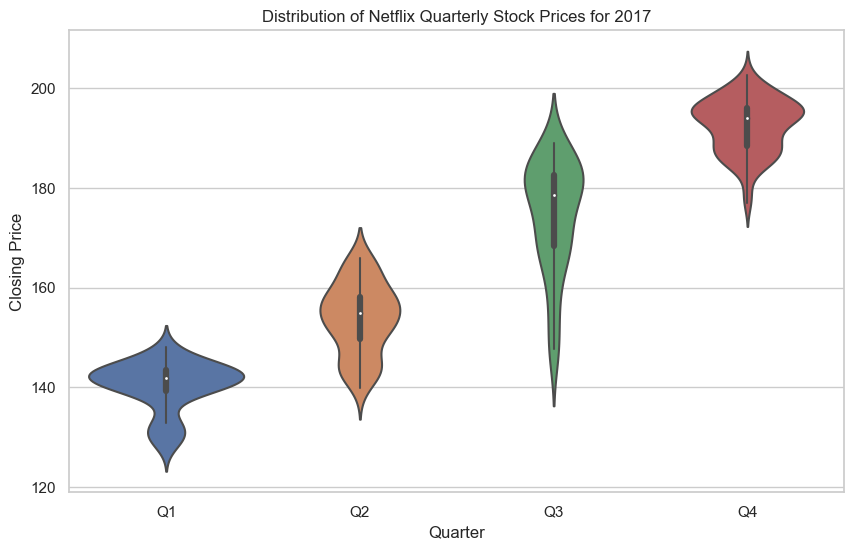

In [7]:
grouped_data = netflix_stocks_quarterly.groupby('Quarter') # let's group it by quarter

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x="Quarter", y="Price", data=netflix_stocks_quarterly)
plt.title('Distribution of Netflix Quarterly Stock Prices for 2017')
plt.xlabel('Quarter')
plt.ylabel('Closing Price')
plt.show()

## - What are your first impressions looking at the visualized data?

Upon initial examination of the violin plot depicting the distribution of Netflix's quarterly stock prices for 2017, several noteworthy observations can be made:

- Increasing Trend: The median stock price increases from Q1 to Q4, suggesting a general upward trend in the stock price over the year.

- Fluctuation Variability: The variability in stock prices, as indicated by the width of the violins, varies from quarter to quarter. Q4 stands out for having the widest distribution, indicating the most significant price fluctuation.

- Concentration of Prices: Each quarter has a range where the prices are most concentrated, with Q4 showing a broader concentration compared to other quarters.

## - In what range(s) did most of the prices fall throughout the year?

The 'bulging' parts of each violin represent the ranges where most of the stock prices are concentrated, essentially capturing the kernel density estimation of the data. Specifically:

- Q1: Most of the adjusted prices appear to be concentrated around \\$135 to \\$145.
- Q2: Prices seem mostly concentrated around \\$150 to \\$165.
- Q3: The concentration appears to be around \\$170 to \\$185.
- Q4: Prices are more evenly distributed, but a noticeable concentration is observed around \\$195 to \\$205.

Throughout the year, it appears that most of the adjusted stock prices were concentrated in the range of approximately \\$135 to \\$205

## - What were the highest and lowest prices? 

Based on the plot, the highest and lowest adjusted closing prices can be approximated as:

- Highest Price: Appears to be around \\$205, observed in Q4.
- Lowest Price: Appears to be around \\$130, observed in Q1.


## Measure Performance of Earnings per Share

Next, we will chart the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. We will accomplish this using a scatter plot. 

Use the following lists to create the scatter plot:

In [8]:
# Set distinct values to seperate quarters 
x_positions = [1, 2, 3, 4]

# Label each of the quarters
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]

# Actual earnings per share
earnings_actual =[.4, .15, .29, .41]

# Estimated projected earnings per share
earnings_estimate = [.37, .15, .32, .41]

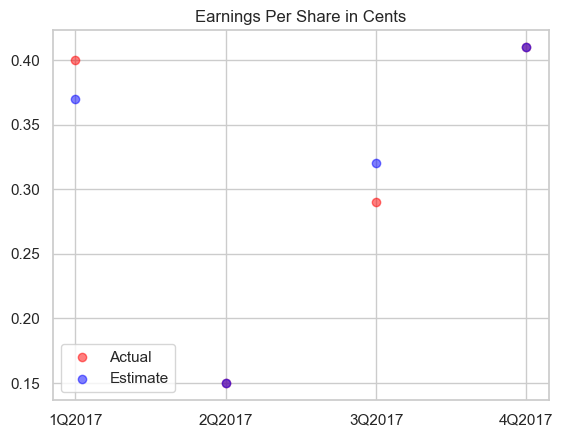

In [9]:
# Created scatter plot of actual earnings & estimated earnings by quarter
fig, ax = plt.subplots()
plt.scatter(x_positions, earnings_actual, color='red', alpha=0.5)
plt.scatter(x_positions, earnings_estimate, color='blue', alpha=0.5)

# Added a legend, title, and x ticks
plt.legend(["Actual", "Estimate"])
plt.xticks(x_positions, chart_labels)
plt.title('Earnings Per Share in Cents')
plt.show()

## Visualize Earnings and Revenue Side by Side

Next, we will visualize the earnings and revenue reported by Netflix by mapping two bars side-by-side.

In [10]:
# The metrics below are in billions of dollars

# Reported values from Netflix
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]

# Quarter labels list

quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

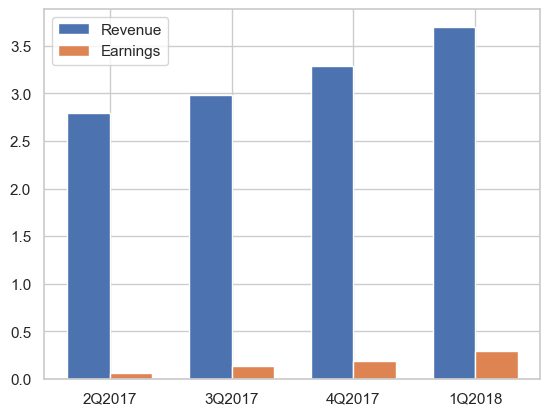

In [11]:
# Set an index for your plot using the length of the quarter labels.
import numpy as np
indx = np.arange(len(quarter_labels))

# Set a value for bar width.
bar_width = 0.35

# Create a subplot 
fig, ax = plt.subplots()
revenue_bar = ax.bar(indx - bar_width/2, revenue_by_quarter, bar_width, label='Revenue')
earnings_bar = ax.bar(indx + bar_width/2, earnings_by_quarter, bar_width, label='Earnings')

# Insert x axis label
ax.set_xticks(indx)
ax.set_xticklabels(quarter_labels)

# inserting legend
ax.legend()

plt.show()


What are your first impressions looking at the visualized data?

**First Impressions of the Visualized Data**

The plot gives an immediate sense of both the revenue and earnings trends over the observed quarters. It is evident that both revenue and earnings are increasing, but the earnings bars are much smaller in comparison to the revenue bars, indicating that earnings constitute a relatively small portion of the revenue.

##### - Does Revenue follow a trend?

Yes, revenue shows a clear upward trend over the four quarters. It starts at \\$2.79 billion in 2Q2017 and increases to \\$3.7 billion by 1Q2018. This suggests a positive growth trajectory for the company in terms of its revenue generation.

##### - Do Earnings follow a trend?

Similarly, earnings also display an upward trend. Starting from \\$0.0656 billion in 2Q2017, they grow to \\$0.29012 billion by 1Q2018. This indicates that not only is the company increasing its revenue, but it is also becoming more profitable over time.

##### - Roughly, what percentage of the revenue constitutes earnings?

To estimate this, we can use this formula:

$
\text{Earnings as a Percentage of Revenue} = \left( \frac{\text{Earnings}}{\text{Revenue}} \right) \times 100
$


The calculated percentages for earnings as a proportion of revenue for each quarter are as follows:

- 2Q2017: Approximately 2.35%
- 3Q2017: Approximately 4.35%
- 4Q2017: Approximately 5.64%
- 1Q2018: Approximately 7.84%

These percentages not only give us an idea of how much of the revenue constitutes earnings but also show an upward trend. This is indicative of increasing operational efficiency or profitability over these quarters.

## Comparing to the Dow Jones Industrial Average

In this last step, we will compare Netflix stock to the Dow Jones Industrial Average in 2017. Let's plot two line charts side by side in one figure.


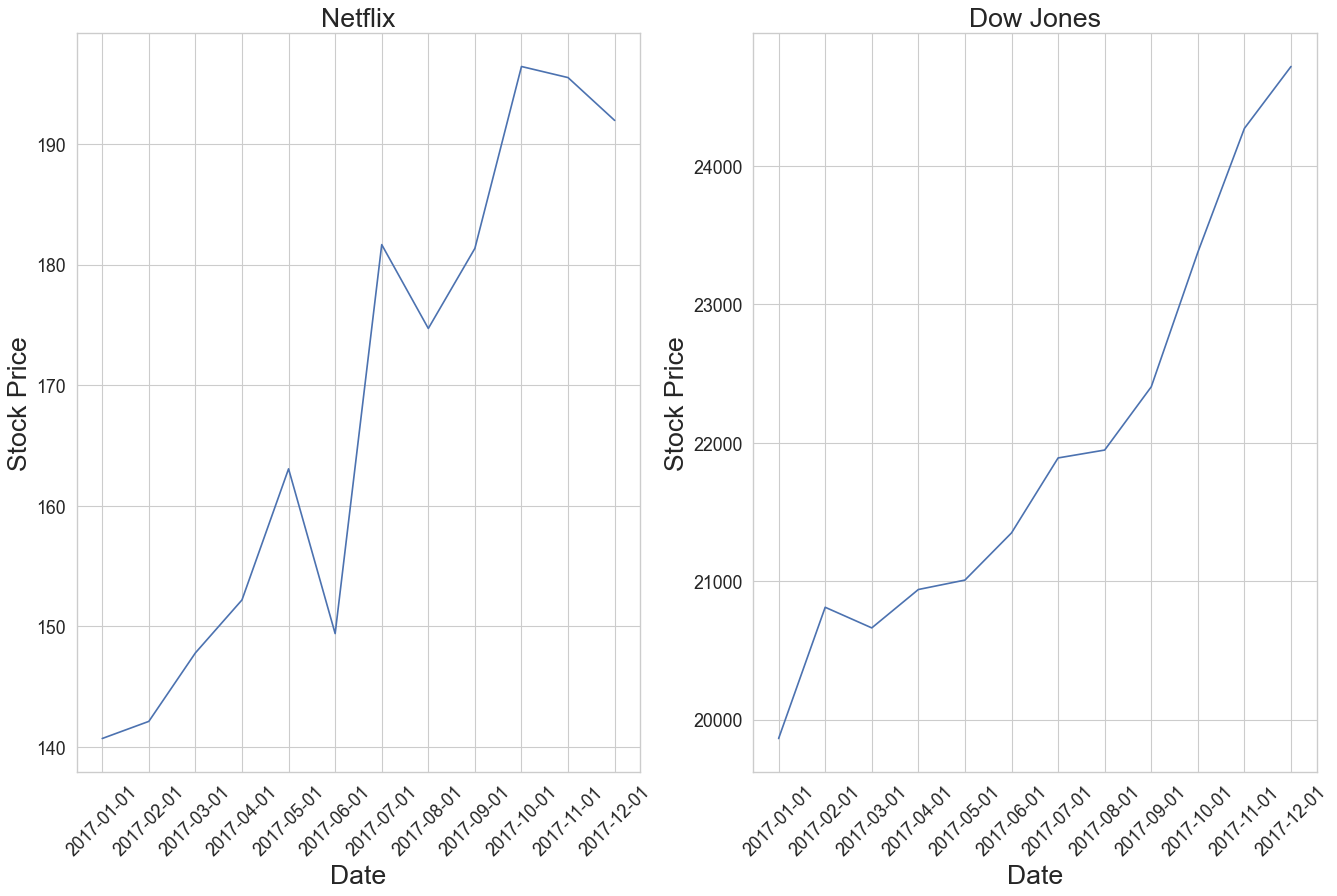

In [12]:
# Left plot Netflix
from matplotlib.pyplot import figure

figure(figsize=(20, 12), dpi=80)
ax1 = plt.subplot(1, 2, 1)
plt.plot(netflix_stocks['Date'], netflix_stocks['Price'])
plt.title("Netflix", fontsize=24)
plt.ylabel("Stock Price", fontsize=24)
plt.xlabel("Date", fontsize=24)
# plt.tick_params(left=True,
#                 bottom=False,
#                 labelleft=True,
#                 labelbottom=False)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16, rotation=45)

# Right plot Dow Jones
ax2 = plt.subplot(1, 2, 2)
plt.plot(dowjones_stocks['Date'], dowjones_stocks['Price'])
plt.title("Dow Jones", fontsize=24)
plt.ylabel("Stock Price", fontsize=24)
plt.xlabel("Date", fontsize=24)
# plt.tick_params(left=True,
#                 bottom=True,
#                 labelleft=True,
#                 labelbottom=True)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16, rotation=45)

#plt.tight_layout()
plt.show()

Let's answer the following questions when analyzing the plots:

#### How did Netflix perform relative to Dow Jones Industrial Average in 2017?

**Netflix:** The stock price of Netflix shows a strong upward trend throughout the year, starting from around \\$130 and ending near \\$200.

**Dow Jones:** The Dow Jones Industrial Average also shows an upward trend but is less steep compared to Netflix.

Overall, Netflix experienced a more pronounced increase in stock price compared to the Dow Jones Industrial Average, indicating that Netflix's performance was relatively stronger in 2017.

#### Which was more volatile?

**Netflix:** The stock price shows some fluctuations and spikes, indicating periods of higher volatility.

**Dow Jones:** The stock price shows a more stable and steady increase, with fewer fluctuations.

Based on this visual assessment, Netflix appears to be more volatile compared to the Dow Jones Industrial Average in 2017.

#### How do the prices of the stocks compare?

**Netflix:** The stock prices range from approximately \\$130 to \\$200.

**Dow Jones:** The stock prices are significantly higher, ranging from around \\$19,000 to approximately \\$24,000.

The price of a single share of the Dow Jones is substantially higher than that of Netflix, but this is not a direct indicator of the companies' respective values, as the number of shares outstanding also plays a crucial role in market capitalization.
